In [62]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [63]:
frames = glob.glob('canoe/*.jpg')


In [64]:
frames #258 frames

['canoe\\in000838.jpg',
 'canoe\\in000839.jpg',
 'canoe\\in000840.jpg',
 'canoe\\in000841.jpg',
 'canoe\\in000842.jpg',
 'canoe\\in000843.jpg',
 'canoe\\in000844.jpg',
 'canoe\\in000845.jpg',
 'canoe\\in000846.jpg',
 'canoe\\in000847.jpg',
 'canoe\\in000848.jpg',
 'canoe\\in000849.jpg',
 'canoe\\in000850.jpg',
 'canoe\\in000851.jpg',
 'canoe\\in000852.jpg',
 'canoe\\in000853.jpg',
 'canoe\\in000854.jpg',
 'canoe\\in000855.jpg',
 'canoe\\in000856.jpg',
 'canoe\\in000857.jpg',
 'canoe\\in000858.jpg',
 'canoe\\in000859.jpg',
 'canoe\\in000860.jpg',
 'canoe\\in000861.jpg',
 'canoe\\in000862.jpg',
 'canoe\\in000863.jpg',
 'canoe\\in000864.jpg',
 'canoe\\in000865.jpg',
 'canoe\\in000866.jpg',
 'canoe\\in000867.jpg',
 'canoe\\in000868.jpg',
 'canoe\\in000869.jpg',
 'canoe\\in000870.jpg',
 'canoe\\in000871.jpg',
 'canoe\\in000872.jpg',
 'canoe\\in000873.jpg',
 'canoe\\in000874.jpg',
 'canoe\\in000875.jpg',
 'canoe\\in000876.jpg',
 'canoe\\in000877.jpg',
 'canoe\\in000878.jpg',
 'canoe\\in00087

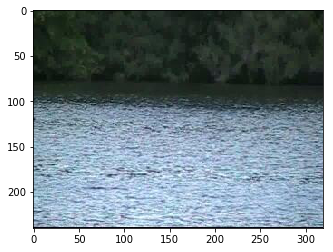

In [65]:
a=plt.imread(frames[1])
plt.imshow(a)

In [66]:
frame = plt.imread(frames[0])
frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])


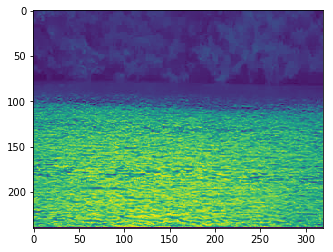

In [67]:
plt.imshow(frame)


In [68]:
np.min(frame)


1.368

In [69]:
shape = frame.shape

In [70]:
shape

(240, 320)

In [71]:
type(frame)

numpy.ndarray

In [72]:
frame

array([[ 36.349,  35.349,  34.349, ...,  23.098,  23.739,  23.739],
       [ 37.349,  36.349,  34.349, ...,  22.098,  21.739,  21.739],
       [ 36.349,  35.349,  34.349, ...,  21.098,  22.098,  22.098],
       ...,
       [194.051, 196.051, 185.051, ..., 145.257, 151.257, 161.257],
       [186.937, 191.937, 197.937, ..., 186.741, 171.741, 152.741],
       [  3.226,   3.226,  13.236, ...,   3.927,   5.329,   3.927]])

In [73]:
K=4

In [74]:
parameters = np.zeros((shape[0],shape[1],K*2 + K))
alpha = 0.001 #To update weight 
#K gaussians, 1 parameter for sigma, 1 for mu for each of the gaussians and 4 parameters for the weights

In [75]:
frame[85,150]

36.739

In [76]:
frame[175,250]

137.79899999999998

In [77]:
import numpy.matlib as nlib
parameters[:,:,8:12]=1/K #Setting initial weights
frame = frame/255.0 #Normalise 1st frame
parameters[:,:,0]=0.0784#20#Standard deviation is one
parameters[:,:,2]=0.0784#20
parameters[:,:,4]=0.0784#20
parameters[:,:,6]=0.0784#20#Standard deviation is one for first frame
frame = plt.imread(frames[0])
parameters[:,:,1]=np.dot(frame[...,:3], [0.299, 0.587, 0.114])/255.0#0.62745#frame#Mean value is just pixel value for first frame
frame = plt.imread(frames[1])
parameters[:,:,3]=np.dot(frame[...,:3], [0.299, 0.587, 0.114])/255.0#0.18#frame
frame = plt.imread(frames[2])
parameters[:,:,5]=np.dot(frame[...,:3], [0.299, 0.587, 0.114])/255.0#0.144#frame
frame = plt.imread(frames[3])
parameters[:,:,7]=np.dot(frame[...,:3], [0.299, 0.587, 0.114])/255.0#0.5806274509803921#frame

In [78]:
#Gaussian function
def Gaussian(mu,sigmasquare,x):
    #mu and x are 1*1
    #a = np.transpose(x-mu)
    #siginv = (1/sigmasquare)*np.array([[1,0,0],[0,1,0],[0,0,1]])
    #b = np.matmul(a,siginv)
    #b = np.matmul(b,x-mu)
    b = (x-mu)*(x-mu)
    b = b*(-1/2)
    b = b/sigmasquare
    b = np.exp(b)
    b = b/np.power(2*22/7,0.5)
    sigma = np.sqrt(sigmasquare)
    b = b/(sigma)
    fg=0
    if(x>mu+2.5*sigma):
        fg=1
    if(x<mu-2.5*sigma):
        fg=1
    b = alpha*b
    return b,fg

2
3
4
5
6
7
8
9
10
11


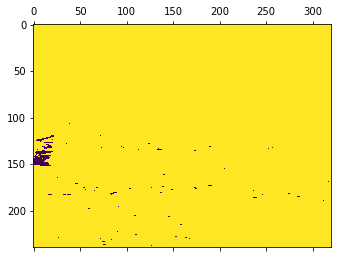

In [79]:
#Parameter updation and backgroud detection using rest of the frames
k=1
#while(ret==True):
while(k<=10):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

12
13
14
15
16
17
18
19
20
21


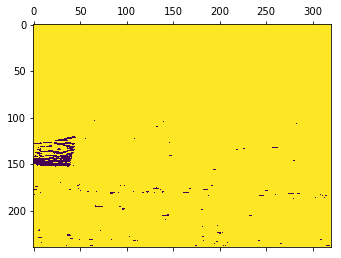

In [80]:
#Parameter updation and backgroud detection using rest of the frames
k=11
#while(ret==True):
while(k<=20):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

22
23
24
25
26
27
28
29
30
31


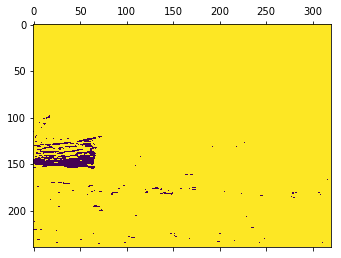

In [81]:
#Parameter updation and backgroud detection using rest of the frames
k=21
#while(ret==True):
while(k<=30):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

32
33
34
35
36
37
38
39
40
41


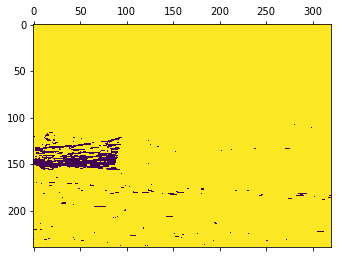

In [82]:
#Parameter updation and backgroud detection using rest of the frames
k=31
#while(ret==True):
while(k<=40):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

42
43
44
45
46
47
48
49
50
51


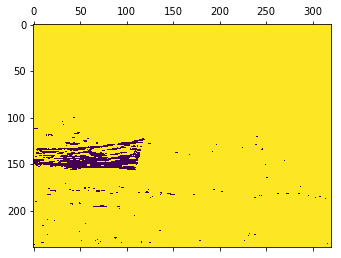

In [83]:
#Parameter updation and backgroud detection using rest of the frames
k=41
#while(ret==True):
while(k<=50):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

52
53
54
55
56
57
58
59
60
61


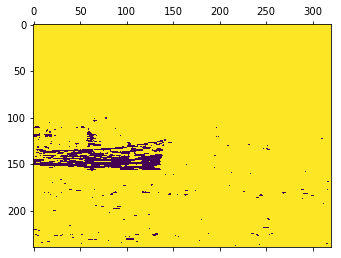

In [84]:
#Parameter updation and backgroud detection using rest of the frames
k=51
#while(ret==True):
while(k<=60):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

62
63
64
65
66
67
68
69
70
71


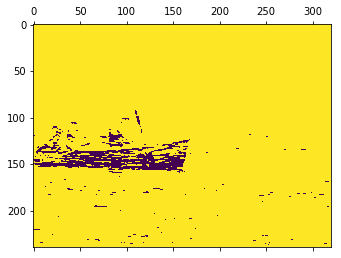

In [85]:
#Parameter updation and backgroud detection using rest of the frames
k=61
#while(ret==True):
while(k<=70):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

72
73
74
75
76
77
78
79
80
81


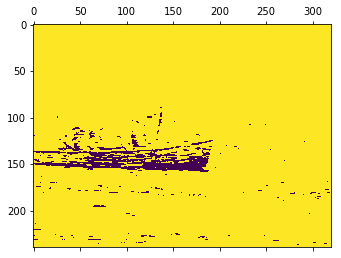

In [86]:
#Parameter updation and backgroud detection using rest of the frames
k=71
#while(ret==True):
while(k<=80):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

82
83
84
85
86
87
88
89
90
91


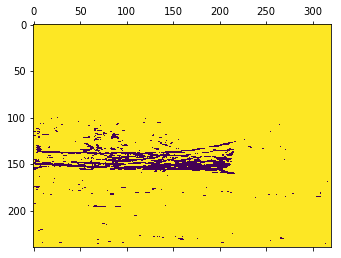

In [87]:
#Parameter updation and backgroud detection using rest of the frames
k=81
#while(ret==True):
while(k<=90):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

92
93
94
95
96
97
98
99
100
101


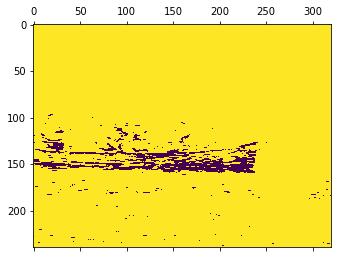

In [88]:
#Parameter updation and backgroud detection using rest of the frames
k=91
#while(ret==True):
while(k<=100):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

102
103
104
105
106
107
108
109
110
111


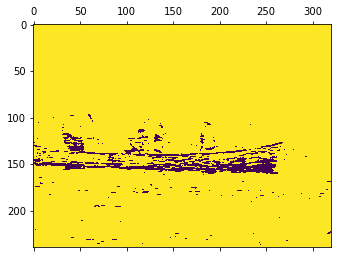

In [89]:
#Parameter updation and backgroud detection using rest of the frames
k=101
#while(ret==True):
while(k<=110):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

112
113
114
115
116
117
118
119
120
121


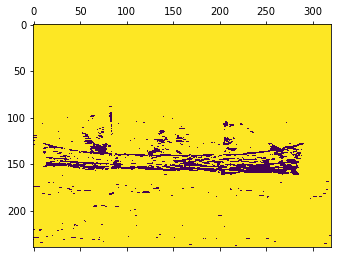

In [90]:
#Parameter updation and backgroud detection using rest of the frames
k=111
#while(ret==True):
while(k<=120):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

122
123
124
125
126
127
128
129
130
131


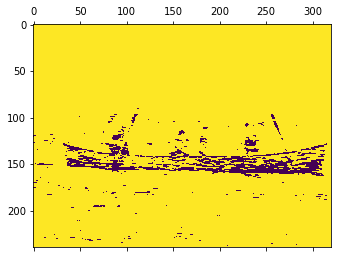

In [91]:
#Parameter updation and backgroud detection using rest of the frames
k=121
#while(ret==True):
while(k<=130):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

132
133
134
135
136
137
138
139
140
141


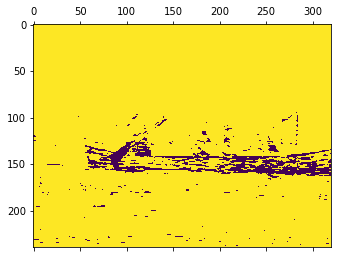

In [92]:
#Parameter updation and backgroud detection using rest of the frames
k=131
#while(ret==True):
while(k<=140):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161


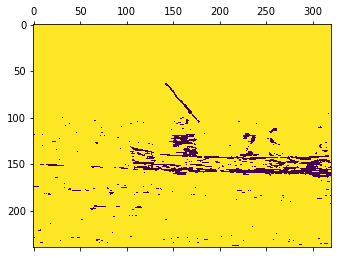

In [93]:
#Parameter updation and backgroud detection using rest of the frames
k=141
#while(ret==True):
while(k<=160):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181


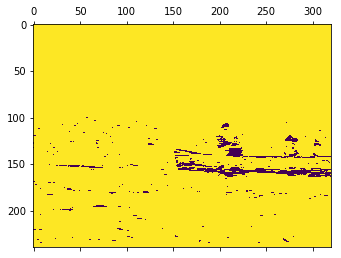

In [94]:
#Parameter updation and backgroud detection using rest of the frames
k=161
#while(ret==True):
while(k<=180):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201


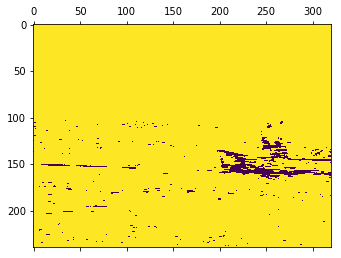

In [95]:
#Parameter updation and backgroud detection using rest of the frames
k=181
#while(ret==True):
while(k<=200):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

202
203
204
205
206
207
208
209
210
211


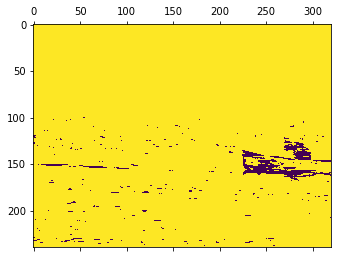

In [96]:
#Parameter updation and backgroud detection using rest of the frames
k=201
#while(ret==True):
while(k<=210):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241


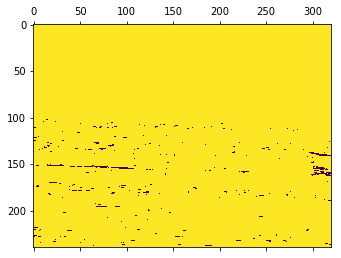

In [97]:
#Parameter updation and backgroud detection using rest of the frames
k=221
#while(ret==True):
while(k<=240):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            

242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258


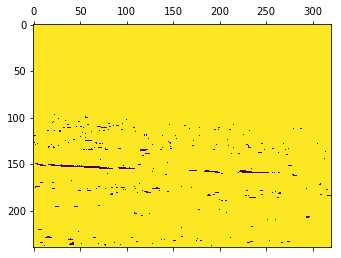

In [98]:
#Parameter updation and backgroud detection using rest of the frames
k=241
#while(ret==True):
while(k<=257):
    frame = plt.imread(frames[k])
    frame = np.dot(frame[...,:3], [0.299, 0.587, 0.114])
    frame = frame/255.0
    k=k+1
    foreground = np.zeros((shape[0],shape[1]))#Full black
    print(k)
    for i in range(shape[0]):
        for j in range(shape[1]):
            #Getting details of current frame with past parameters
            ro1,fg1 = Gaussian(np.transpose(parameters[i,j,1]),parameters[i,j,0],np.transpose(frame[i,j]))
            ro2,fg2 = Gaussian(np.transpose(parameters[i,j,3]),parameters[i,j,2],np.transpose(frame[i,j]))
            ro3,fg3 = Gaussian(np.transpose(parameters[i,j,5]),parameters[i,j,4],np.transpose(frame[i,j]))
            ro4,fg4 = Gaussian(np.transpose(parameters[i,j,7]),parameters[i,j,6],np.transpose(frame[i,j]))
            prob = parameters[i,j,8]*ro1+parameters[i,j,9]*ro2+parameters[i,j,10]*ro3+parameters[i,j,11]*ro4
            prob = prob/alpha
            if(prob>0.6):
                foreground[i,j]=1
            #Updating weights
            if(fg1>=2):
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]+(alpha)
            else:
                parameters[i,j,8] = (1-alpha)*parameters[i,j,8]
            if(fg2>=2):
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]+(alpha)
            else:
                parameters[i,j,9] = (1-alpha)*parameters[i,j,9]
            if(fg3>=2):
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]+(alpha)
            else:
                parameters[i,j,10] = (1-alpha)*parameters[i,j,10]
            if(fg4>=2):
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]+(alpha)
            else:
                parameters[i,j,11] = (1-alpha)*parameters[i,j,11]
            #Updating mu
            parameters[i,j,1] = (1-ro1)*parameters[i,j,1] + ro1*frame[i,j]
            parameters[i,j,3] = (1-ro2)*parameters[i,j,3] + ro2*frame[i,j]
            parameters[i,j,5] = (1-ro3)*parameters[i,j,5] + ro3*frame[i,j]
            parameters[i,j,7] = (1-ro4)*parameters[i,j,7] + ro4*frame[i,j]
            #Updating sigma
            parameters[i,j,0] = (1-ro1)*parameters[i,j,0] + ro1*(frame[i,j]-parameters[i,j,1])*(frame[i,j]-parameters[i,j,1])
            parameters[i,j,2] = (1-ro2)*parameters[i,j,2] + ro2*(frame[i,j]-parameters[i,j,3])*(frame[i,j]-parameters[i,j,3])
            parameters[i,j,4] = (1-ro3)*parameters[i,j,4] + ro3*(frame[i,j]-parameters[i,j,5])*(frame[i,j]-parameters[i,j,5])
            parameters[i,j,6] = (1-ro4)*parameters[i,j,6] + ro4*(frame[i,j]-parameters[i,j,7])*(frame[i,j]-parameters[i,j,7])
            #if(k%10==0):
            #    plt.matshow(foreground)
plt.matshow(foreground)            